# A/B testing (split testing) is a method of comparing two versions of a web page or application against each other to determine which performs better. AB testing mainly uses statistical analysis to determine which variation performs better for a given conversion goal.

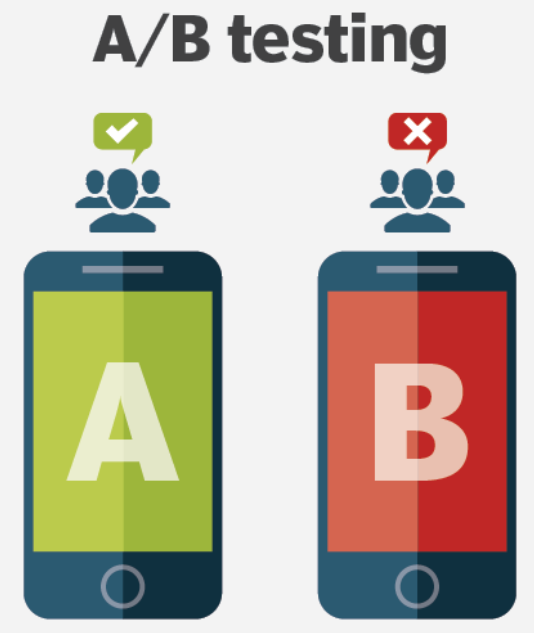

**Business Problem:**
Facebook recently introduced a new type of bid, average bidding, as an alternative to the current type of bidding called maximum bidding. xxx.com decided to test this new feature and wants to do an A/B test to see.
 
 **Variables**

**Impression:** Ad views
 
**Click:** Indicates the number of times the ad was clicked.
 
**Buy:** The number of products purchased after clicking on the ads
 
**Earnings:** Earnings after purchased items

In [1]:
# import libraries

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal


In [2]:
# Read the dataset ab_testing_data.xlsx consisting of control and test group data

control_df = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name="Control Group")
test_df = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name="Test Group")

In [3]:
# Analyzing control group data

control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [4]:
# Analyzing test group data

test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


In [5]:
# Creation of "T" and "C" bidding variables

test_df['bidding']='T'
control_df['bidding']='C'

In [6]:
# Combining control and test group data using the concat method

ab_concat = pd.concat([control_df, test_df]).reset_index()
ab_concat.head()

,index,Impression,Click,Purchase,Earning,bidding
0,0,82529.45927,6090.07732,665.21125,2311.27714,C
1,1,98050.45193,3382.86179,315.08489,1742.80686,C
2,2,82696.02355,4167.96575,458.08374,1797.82745,C
3,3,109914.40040,4910.88224,487.09077,1696.22918,C
4,4,108457.76263,5987.65581,441.03405,1543.72018,C


In [7]:
ab_concat.tail()

,index,Impression,Click,Purchase,Earning,bidding
75,35,79234.91193,6002.21358,382.04712,2277.86398,T
76,36,130702.23941,3626.32007,449.82459,2530.84133,T
77,37,116481.87337,4702.78247,472.45373,2597.91763,T
78,38,79033.83492,4495.42818,425.35910,2595.85788,T
79,39,102257.45409,4800.06832,521.31073,2967.51839,T


# **Set up the hypothesis**

**H0: M1 = M2** There is no statistical difference between the two groups.

**H1: M1!= M2**

In [8]:
# Analyzing purchase averages for the control and test group
ab_concat.groupby("bidding")["Purchase"].mean()

bidding
C   550.89406
T   582.10610
Name: Purchase, dtype: float64

In [9]:
# Whether the control and test groups comply with the normality assumption is tested separately over the Purchase variable.

test_stat, pvalue = shapiro(ab_concat.loc[ab_concat["bidding"] == "C", "Purchase"]) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [10]:
test_stat, pvalue = shapiro(ab_concat.loc[ab_concat["bidding"] == "T", "Purchase"]) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


In [11]:
# Variance Homogeneity control

test_stat, pvalue = levene(ab_concat.loc[ab_concat["bidding"] == "C", "Purchase"],
                           ab_concat.loc[ab_concat["bidding"] == "T", "Purchase"])      

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [12]:
# The p_value is greater than 0.05.  Assumption of Normality and Homogeneity of Variance are provided.

test_stat, pvalue = ttest_ind(ab_concat.loc[ab_concat["bidding"] == "C", "Purchase"],
                              ab_concat.loc[ab_concat["bidding"] == "T", "Purchase"],   
                                  equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


# Conclusion

#    p-value = 0.3494, in which case the hypothesis is accepted because the p-value is greater than 0.05.
#    There is no statistical difference between the two groups.
#    The second system needs to be developed.